In [29]:
from textstat.textstat import textstat
import csv
import pandas
import matplotlib
#matplotlib.style.use('ggplot')
%matplotlib inline
import ast
pandas.options.display.max_colwidth = 100000
import beauty
beauty.set_tex(False)
import matplotlib.pyplot as plt

## Keep all topics

In [2]:
all_df = pandas.read_csv('data/all_candidates_nop.csv') 
#TOPICS = ['Immigration', 'Campaign Finance', 'Foreign Policy/National Security','Abortion']
#all_df = all_df[(all_df['top_topic'].isin(TOPICS))]
deduped_title = all_df.drop_duplicates('title') 

In [3]:
re_all = 'hillary|clinton|bernie|sanders|marco|rubio|donald|trump|ted|cruz|john|kasich'
clinton_only = deduped_title[(~deduped_title['title'].str.contains('bernie|sanders|marco|rubio|donald|trump|ted|cruz|john|kasich', case=False))]
trump_only = deduped_title[(~deduped_title['title'].str.contains('hillary|clinton|bernie|sanders|marco|rubio|ted|cruz|john|kasich', case=False))]
sanders_only = deduped_title[(~deduped_title['title'].str.contains('hillary|clinton|marco|rubio|donald|trump|ted|cruz|john|kasich', case=False))]
cruz_only = deduped_title[(~deduped_title['title'].str.contains('bernie|sanders|hillary|clinton|marco|rubio|donald|trump|john|kasich', case=False))]

In [15]:
print len(trump_only)
print len(clinton_only)
print len(sanders_only)
print len(cruz_only)

666
181
135
177


In [4]:
all_df = pandas.concat([clinton_only, trump_only, sanders_only, cruz_only])
#all_df.to_csv('data/all_candidates_all_topics_single_candidate_stories.csv')

# Get top n % by {Flesch, G-F}

CLINTON

HEAD


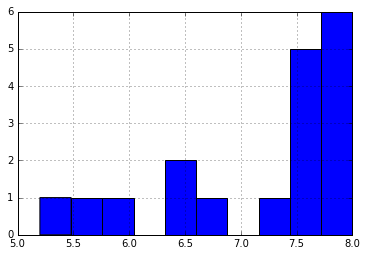

nyt          7
politico     4
wsj          2
npr          1
mcclatchy    1
latimes      1
cnn          1
huffpo       1
Name: org, dtype: int64
TAIL


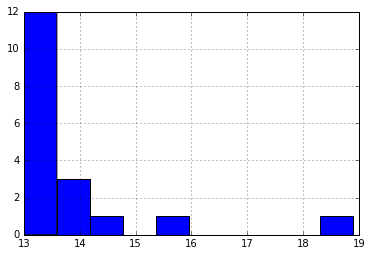

fox         6
cnn         4
npr         2
latimes     2
wsj         1
politico    1
huffpo      1
ap          1
Name: org, dtype: int64
TRUMP

HEAD


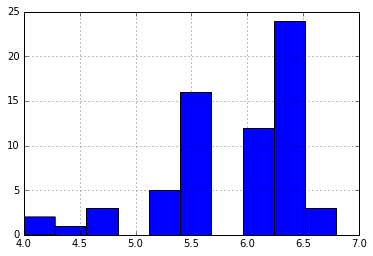

nyt          29
politico     13
huffpo        6
wsj           5
fox           4
mcclatchy     3
npr           2
cnn           2
ap            2
Name: org, dtype: int64
TAIL


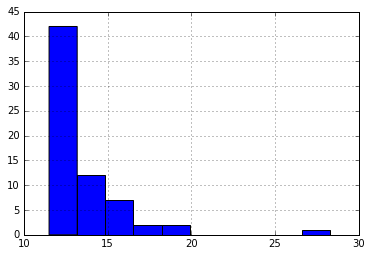

huffpo       17
buzzfeed     12
cnn           8
reuters       8
latimes       7
fox           4
nyt           2
politico      2
ap            2
wsj           2
mcclatchy     1
npr           1
Name: org, dtype: int64
CRUZ

HEAD


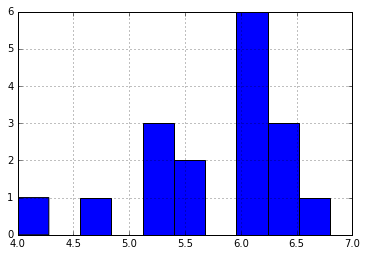

nyt         8
wsj         4
cnn         2
politico    1
huffpo      1
ap          1
Name: org, dtype: int64
TAIL


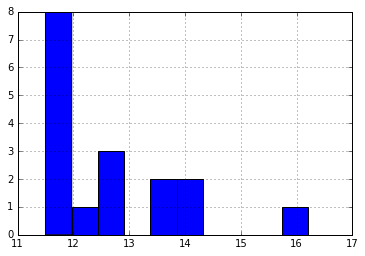

cnn         4
huffpo      4
politico    3
buzzfeed    2
nyt         1
reuters     1
ap          1
wsj         1
Name: org, dtype: int64
SANDERS

HEAD


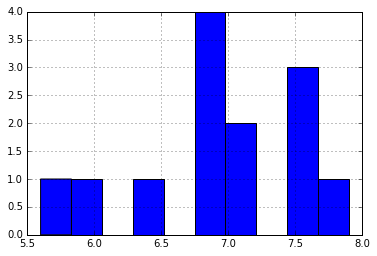

politico    6
nyt         4
wsj         3
Name: org, dtype: int64
TAIL


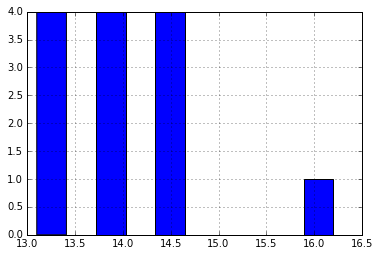

huffpo      11
cnn          1
politico     1
Name: org, dtype: int64


In [48]:
CANDIDATES = ['clinton', 'trump', 'cruz', 'sanders']
for c in CANDIDATES:
    print c.upper()
    print
    sorted_c = all_df[all_df['candidate'] == c].sort_values('flesch')
    n = len(sorted_c)
    head = sorted_c.head(int(n*.10))
    tail = sorted_c.tail(int(n*.10))
    print "HEAD"
    head.flesch.hist()
    matplotlib.pyplot.show()
    print head.org.value_counts()
    head.top_topic.value_counts()
    head[['top_topic', 'org']]
    
    print "TAIL"
    tail.flesch.hist()
    matplotlib.pyplot.show()
    print tail.org.value_counts()
    tail.top_topic.value_counts()
    tail[['top_topic', 'org']]


In [54]:
ORGS = set(all_df.org) 

# Also look at Topics dist

In [61]:
CANDIDATES = ['clinton', 'trump', 'cruz', 'sanders']
for c in CANDIDATES:
    print c.upper()
    sorted_c = all_df[all_df['candidate'] == c].sort_values('flesch')
    n = len(sorted_c)
    head = sorted_c.head(int(n*.10))
    tail = sorted_c.tail(int(n*.10))
    print "LOW"
    print head.top_topic.value_counts()
    print
    #print head[['org', 'top_topic', 'flesch']]
    print
    print "HIGH"
    print tail.top_topic.value_counts()
    print
    #print tail[['org', 'top_topic', 'flesch']]
    print
    """
    for o in ORGS:
        print "LOW"
        head
    print "LOW" 
    matplotlib.pyplot.show()
    print head.org.value_counts()
    head.top_topic.value_counts()
     
    print "HIGH"
    tail.flesch.hist()
    matplotlib.pyplot.show()
    print tail.org.value_counts()
    tail.top_topic.value_counts()
    tail[['top_topic', 'org']]
    """


CLINTON
LOW
Campaign Finance                    9
Health Care                         3
Foreign Policy/National Security    2
Budget/Taxation                     1
Ethics                              1
Education                           1
Economy                             1
Name: top_topic, dtype: int64


HIGH
Ethics                              6
Foreign Policy/National Security    4
Abortion                            2
Financial Regulation                1
Immigration                         1
Jobs/Employment                     1
Economy                             1
Health Care                         1
Campaign Finance                    1
Name: top_topic, dtype: int64


TRUMP
LOW
Foreign Policy/National Security    18
Campaign Finance                    12
Immigration                         10
Abortion                             6
Health Care                          6
LGBT Issues                          6
Racial Issues                        2
Veterans                    

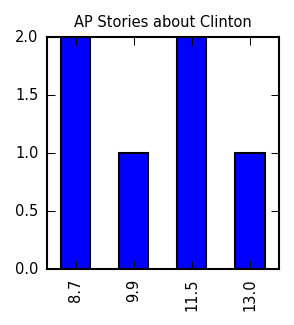

In [39]:
all_df[(all_df.candidate == 'clinton') & (all_df.org == 'ap')].flesch.value_counts().sort_index().plot(kind='bar')
plt.title('AP Stories about Clinton', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.savefig('../STUDY2/FIGS/AP_Clinton.png')

In [96]:
all_df[(all_df.candidate == 'cruz')  & (all_df.org=='ap') ].sort_values('flesch', ascending=True)[['flesch' ,'title','top_topic', 'org']]

,flesch,title,top_topic,org
1746,6.4,Cruz says he doesn't want to forget lessons of 2000 election,Veterans,ap
1885,8.4,New Yorkers blast Cruz's comments on 'New York values',Campaign Finance,ap
2025,9.1,The Latest: Bible prominent in final Cruz pitches to voters,Immigration,ap
2029,9.1,The Latest: Cruz defends 'voting violation' mailer,Immigration,ap
2030,9.1,The Latest: Cruz gets nod from actor Clint Howard,Campaign Finance,ap
2031,9.1,The Latest: Cruz: Leave school lunch decisions to districts,Immigration,ap
2034,9.1,The Latest: Iowa election official criticizes Cruz mailer,Immigration,ap
1715,9.5,Cruz embraces supporters on fringe of GOP,Abortion,ap
1724,9.5,Cruz looks to shore up support among Iowa evangelicals,Abortion,ap
1726,9.5,"Cruz may be first Hispanic president, but rejects the label",Immigration,ap


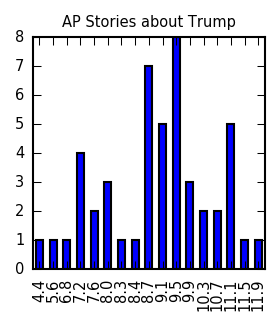

In [40]:
all_df[(all_df.candidate == 'trump') & (all_df.org == 'ap')].flesch.value_counts().sort_index().plot(kind='bar')
plt.title('AP Stories about Trump', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.savefig('../STUDY2/FIGS/AP_Trump.png')

In [93]:
c = 'trump'
n = len(all_df[(all_df.candidate == c)])
print n
all_df[(all_df.candidate == c)].sort_values('flesch',ascending=False)[['title','flesch','org','top_topic']].head(n/4)

666


,title,flesch,org,top_topic
817,"Trump On Immigration In 2013: “You’re Dealing With Human Beings,” “Do The Right Thing”",28.3,buzzfeed,Immigration
136,Donald Trump Gets His Feelings Hurt In Raucous Republican Debate,18.5,buzzfeed,Campaign Finance
940,Watch Trump Ding Reagan For Driving Up The Deficit,18.5,buzzfeed,Foreign Policy/National Security
791,"Trump: ""I Think I Did A Smart Thing"" Avoiding ""Tough"" Videos At Debate",17.7,buzzfeed,Foreign Policy/National Security
182,Donald Trump Spoke Forcefully Against NAFTA At A 1993 Business Conference,17.7,buzzfeed,Trade
209,Evaluations: Why I Can’t Learn to Love Donald Trump,16.2,nyt,Foreign Policy/National Security
363,Huckabee says he will attend Trump event for veterans in Iowa: CNN,16.2,reuters,Veterans
208,Establishment Republicans Scramble To Top Trump,15.8,npr,Foreign Policy/National Security
725,Trump Campaign Manager: Bush Administration Ignored Pre-9/11 Terror Threats,15.8,buzzfeed,Foreign Policy/National Security
818,"Trump On Second-Place Finish In Iowa: ""I Did The Best Job Per Dollar Spent""",15.8,buzzfeed,Campaign Finance
